In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temp = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").all()

In [5]:
#  3. Convert the June temperatures to a list.
June_temp_list = list(np.ravel(June_temp))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temp_df = pd.DataFrame(June_temp_list, columns = ['temperature'])

In [7]:
June_temp_df

,temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
December_temp = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").all()

In [10]:
# 7. Convert the December temperatures to a list.
December_temp_list = list(np.ravel(December_temp))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_temp_df = pd.DataFrame(December_temp_list, columns = ['temperature'])

In [12]:
December_temp_df.head()

,temperature
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [14]:
# Find out all columns available 
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
June_temp

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [70]:
# Let's subset data to the last 3 years and visualize it  
June_temp_2015 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").\
filter(func.strftime("%Y", Measurement.date) == "2015").all()

June_temp_2016 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").\
filter(func.strftime("%Y", Measurement.date) == "2016").all()

June_temp_2017 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").\
filter(func.strftime("%Y", Measurement.date) == "2017").all()

In [71]:
June_temp_df_2015 = pd.DataFrame(June_temp_2015, columns = ['date','temperature'])
June_temp_df_2015 = June_temp_df_2015.set_index('date')

June_temp_df_2016 = pd.DataFrame(June_temp_2016, columns = ['date','temperature'])
June_temp_df_2016 = June_temp_df_2016.set_index('date')

June_temp_df_2017 = pd.DataFrame(June_temp_2017, columns = ['date','temperature'])
June_temp_df_2017 = June_temp_df_2017.set_index('date')

<AxesSubplot:xlabel='date'>

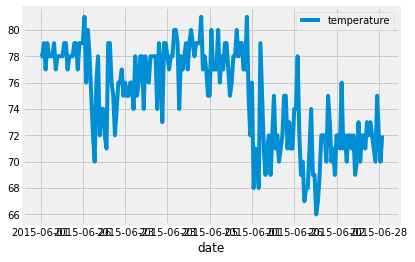

In [91]:
June_temp_df_2015.plot.line()

<AxesSubplot:xlabel='date'>

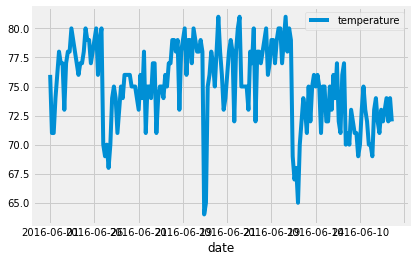

In [73]:
June_temp_df_2016.plot.line()

<AxesSubplot:xlabel='date'>

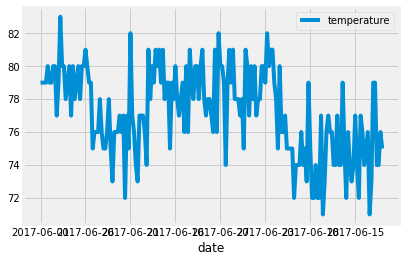

In [75]:
June_temp_df_2017.plot.line()

In [85]:
# Let's subset data to the last 3 years and visualize it  
December_temp_2014 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").\
filter(func.strftime("%Y", Measurement.date) == "2014").all()

December_temp_2015 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").\
filter(func.strftime("%Y", Measurement.date) == "2015").all()

December_temp_2016 = session.query(Measurement.date, Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").\
filter(func.strftime("%Y", Measurement.date) == "2016").all()

In [87]:
December_temp_df_2014 = pd.DataFrame(December_temp_2014, columns = ['date','temperature'])
December_temp_df_2014 = December_temp_df_2014.set_index('date')

December_temp_df_2015 = pd.DataFrame(December_temp_2015, columns = ['date','temperature'])
December_temp_df_2015 = December_temp_df_2015.set_index('date')

December_temp_df_2016 = pd.DataFrame(December_temp_2016, columns = ['date','temperature'])
December_temp_df_2016 = December_temp_df_2016.set_index('date')

<AxesSubplot:xlabel='date'>

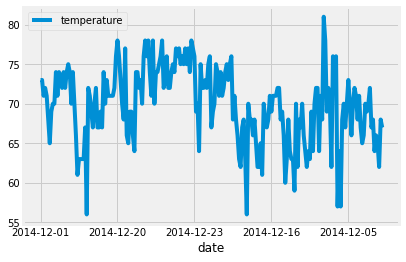

In [94]:
December_temp_df_2014.plot.line()

<AxesSubplot:xlabel='date'>

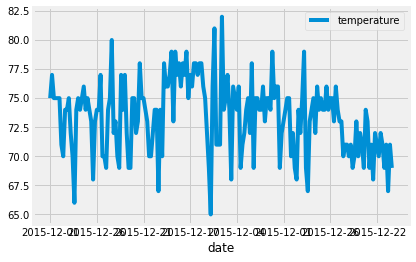

In [92]:
December_temp_df_2015.plot.line()

<AxesSubplot:xlabel='date'>

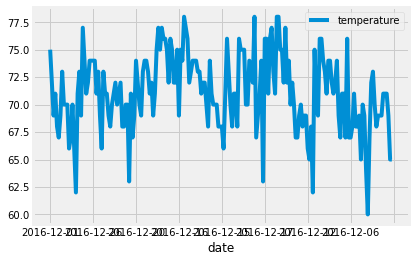

In [93]:
December_temp_df_2016.plot.line()